In [60]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
file_path = "/content/drive/MyDrive/CS210_Datas/gelişmiş ülkeler datası/demokrasi.xlsx"
file_path2 = "/content/drive/MyDrive/CS210_Datas/gelen turist datası/Türkiye'ye giriş yapan yabancılar/data.xlsx"

Mounted at /content/drive/


In [61]:
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
democ = pd.read_excel(file_path)
df = pd.read_excel(file_path2,skiprows=3)
#df[0:50]

2881443.0


In [63]:
cleaner = "/content/drive/MyDrive/CS210_Datas/gelişmiş ülkeler datası/demokrasi_labeled.xlsx"
democratic = pd.read_excel(cleaner)
mrclean = "/content/drive/MyDrive/CS210_Datas/gelen turist datası/Türkiye'ye giriş yapan yabancılar/datacleaned.xlsx"
arriving = pd.read_excel(mrclean,skiprows=3)
democratic

,Rank,Country,Point,Type
0,1,Denmark,0.958,Working Democracy
1,2,Norway,0.956,Working Democracy
2,3,Finland,0.946,Working Democracy
3,4,Sweden,0.946,Working Democracy
4,5,Germany,0.944,Working Democracy
...,...,...,...,...
171,172,China,0.048,Hard Autocracy
172,173,Saudi Arabia,0.048,Hard Autocracy
173,174,Yemen,0.041,Hard Autocracy
174,175,North Korea,0.029,Hard Autocracy


bulamadımU.S.A.
bulamadımKorea
bulamadımBosnia Herzegovina
bulamadımKyrghyzstan
bulamadımRussian Federation
bulamadımBahreyn
bulamadımU.A.E.
bulamadımPalestine
bulamadımT.R.N.C.
bulamadımRepublic of South Africa
bulamadımSenegal
True
[[19, 2, 0, 0, 0], [3, 0, 1, 0, 0], [3, 6, 0, 0, 0], [0, 3, 0, 3, 3], [0, 0, 1, 0, 1], [0, 1, 3, 0, 0], [0, 0, 1, 3, 0], [1, 0, 3, 2, 3], [0, 0, 3, 2, 2], [1, 7, 2, 0, 0]]


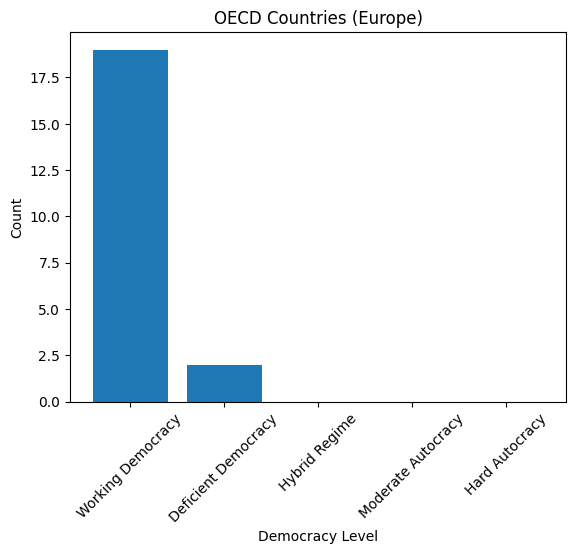

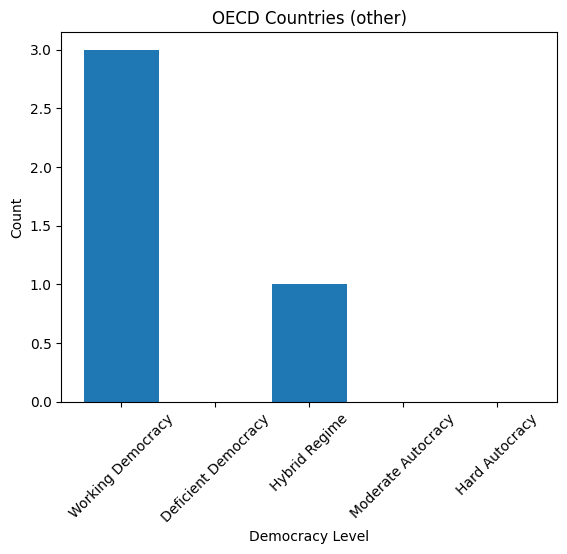

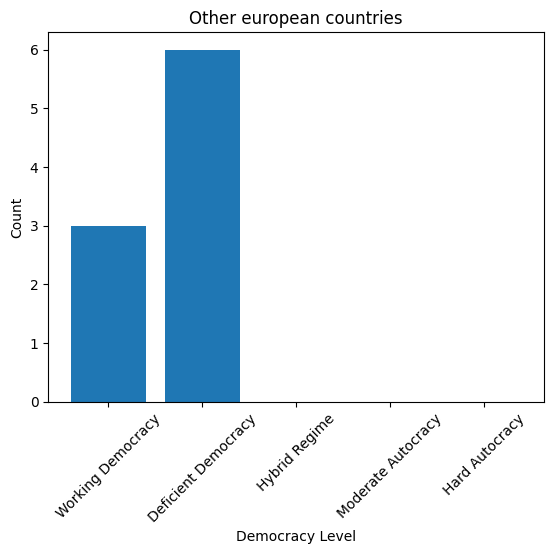

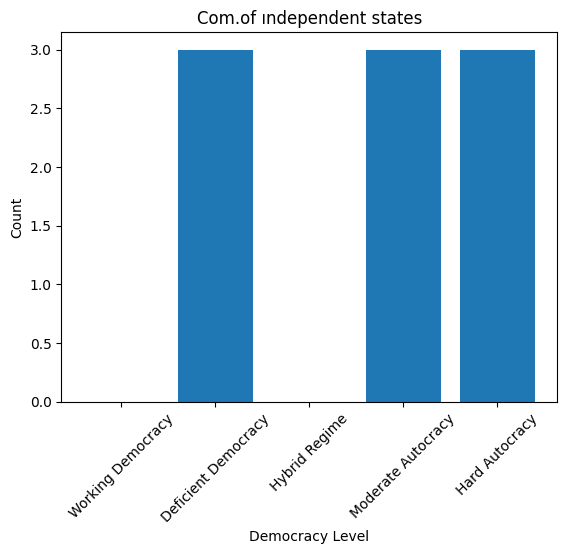

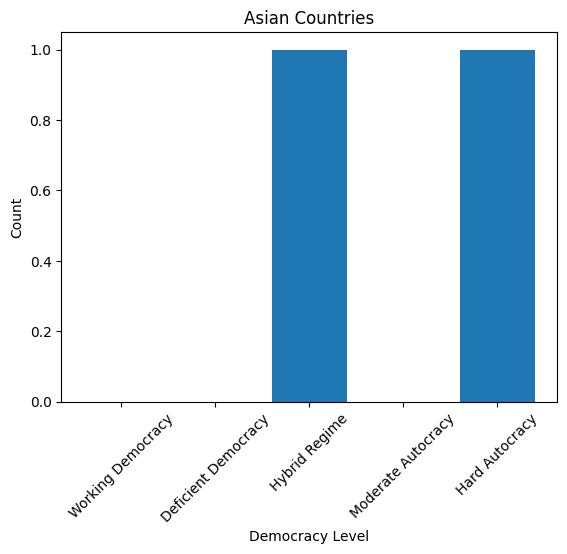

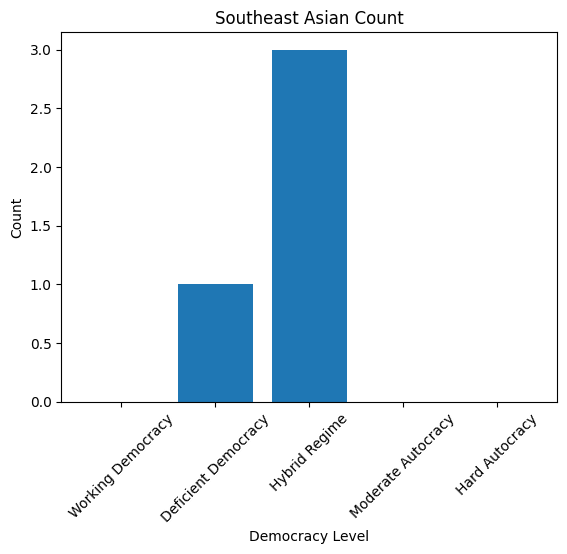

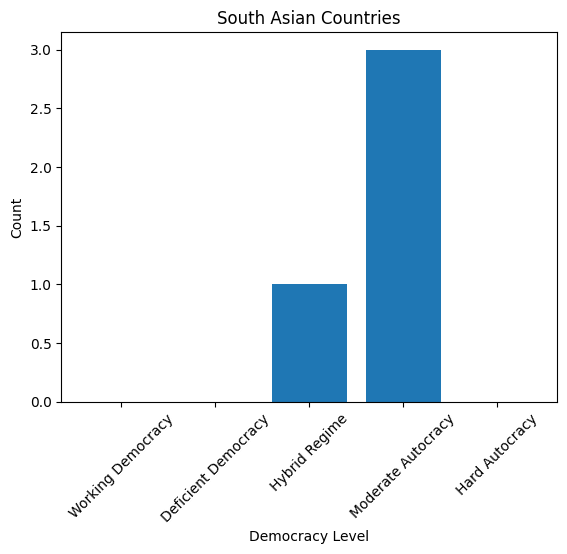

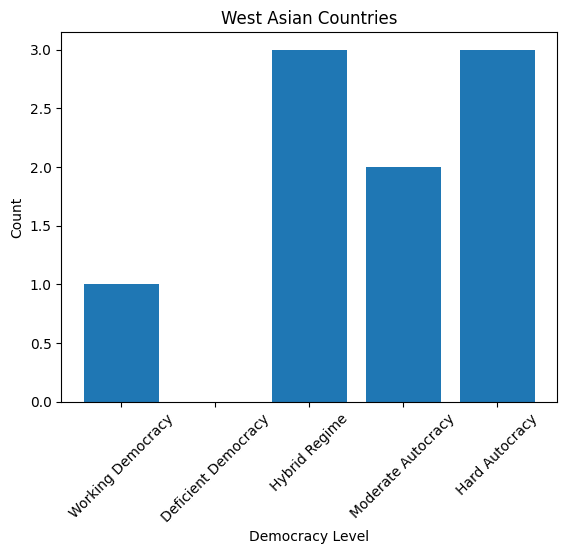

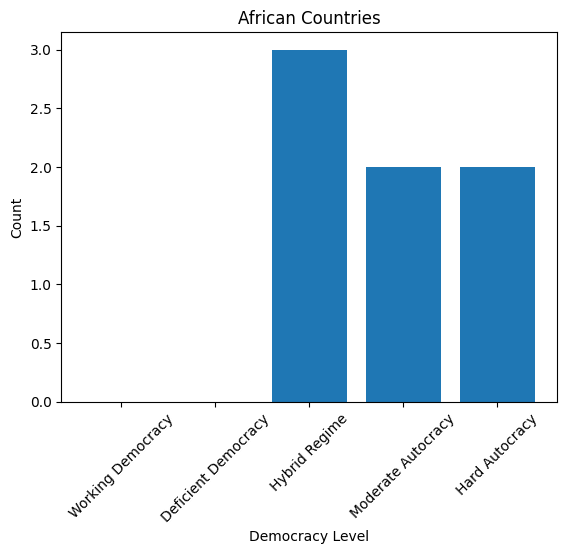

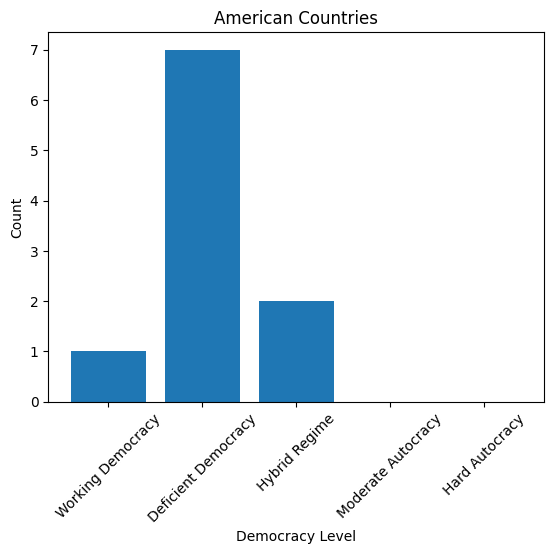

In [75]:
regions = ["OECD Countries (Europe)", "OECD Countries (other)", "Other european countries", "Com.of ındependent states", "Asian Countries", "Southeast Asian Count", "South Asian Countries", "West Asian Countries", "African Countries", "American Countries"]
democracy_level = ["Working Democracy", "Deficient Democracy", "Hybrid Regime", "Moderate Autocracy", "Hard Autocracy"]
datas = [[0] * 5 for _ in range(len(regions))]

# 2-23 25-31 33-43 46-57 59-61 63-67 70-74 77-90 92-101 104-114

index_ranges = [(2, 23), (25, 31), (33, 43), (46, 57), (59, 61), (63, 67), (70, 74), (77, 90), (92, 101), (104, 114)]

second_column_list = democratic.iloc[:, 1].tolist()
first_column_list = df.iloc[:, 0].tolist()

countries = []


for i in range(1, 11):
  countries.append(first_column_list[list(index_ranges[i - 1])[0] : list(index_ranges[i - 1])[1]])



for i in range(len(countries)):
  for j in range(len(countries[i])):
    coun = countries[i][j]
    index = coun.find("-")
    coun2 = coun[index + 1:].strip()
    countries[i][j] = coun2

for i in range(len(countries)):
  for j in range(len(countries[i])):
    try:
      index = second_column_list.index(countries[i][j])
      out = str(index) + "-----" + countries[i][j] ### ÜLKE PROBLEMİNİ DÜZELMEN LAZIM BİR TÜRLÜ OLMUYOR
      #print(out)
      row_index = index  # Replace with the desired row index
      third_column = democratic.iloc[row_index, 3]
      #print(third_column)
      index2 = democracy_level.index(third_column)
      datas[i][index2] += 1    
    except Exception as e:
      print("bulamadım" + countries[i][j])
      
      #break


print(second_column_list[4] == countries[0][0])
#print(countries[0][0])
print(datas)
ii = 0
for sublist in datas:
    indexes = range(len(sublist))
    plt.bar(indexes, sublist)
    plt.xticks(indexes, democracy_level, rotation=45)
    plt.xlabel('Democracy Level')
    plt.ylabel('Count')
    plt.title(regions[ii])
    ii += 1
    plt.show()


In [65]:
"""
regions = ["OECD Countries (Europe)", "OECD Countries (other)", "Other european countries", "Com.of ındependent states", "Asian Countries", "Southeast Asian Count", "South Asian Countries", "West Asian Countries", "African Countries", "American Countries"]
democracy_level = ["Working Democracy", "Deficient Democracy", "Hybrid Regime", "Moderate Autocracy", "Hard Autocracy"]

# 2-23 25-31 33-43 46-57 59-61 63-67 70-74 77-90 92-101 104-114

index_ranges = [(2, 23), (25, 31), (33, 43), (46, 57), (59, 61), (63, 67), (70, 74), (77, 90), (92, 101), (104, 114)]

# Initialize a list to store the groups
groups = []

# Iterate over the index ranges
for start, end in index_ranges:
    # Extract the nation names for the current group
    group = list(df.loc[start:end, 'Milliyet - Nationality'])
    for i in range(len(group)):
      indx = group[i].find("-")
      countri = group[indx + 1:]
      print(str(countri) + "----" + str(group[i]))
      group[i] = indx
    # Append the group to the list of groups
    groups.append(group)

# Print the list of groups
#print(groups)

"""


'\nregions = ["OECD Countries (Europe)", "OECD Countries (other)", "Other european countries", "Com.of ındependent states", "Asian Countries", "Southeast Asian Count", "South Asian Countries", "West Asian Countries", "African Countries", "American Countries"]\ndemocracy_level = ["Working Democracy", "Deficient Democracy", "Hybrid Regime", "Moderate Autocracy", "Hard Autocracy"]\n\n# 2-23 25-31 33-43 46-57 59-61 63-67 70-74 77-90 92-101 104-114\n\nindex_ranges = [(2, 23), (25, 31), (33, 43), (46, 57), (59, 61), (63, 67), (70, 74), (77, 90), (92, 101), (104, 114)]\n\n# Initialize a list to store the groups\ngroups = []\n\n# Iterate over the index ranges\nfor start, end in index_ranges:\n    # Extract the nation names for the current group\n    group = list(df.loc[start:end, \'Milliyet - Nationality\'])\n    for i in range(len(group)):\n      indx = group[i].find("-")\n      countri = group[indx + 1:]\n      print(str(countri) + "----" + str(group[i]))\n      group[i] = indx\n    # Append

In [66]:
#merged_df = arriving.merge(democratic.iloc[:, [1, 2, 3]], left_on='Country', right_on=1, how='left')
#merged_df = merged_df.rename(columns={1: 'Democracy Level', 2: 'Type of Authority'})

In [67]:
#print(democratic.columns)